In [6]:
%matplotlib inline

In [1]:
import gc
import ast
import math
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt

In [8]:
# Set packages options
#np.set_printoptions(threshold=np.nan)
plt.rcParams["figure.figsize"] = (13, 13)

In [3]:
# Constants
TypeColorMappings = {"Water": "#6890F0", "Fire": "#F08030", "Grass": "#78C850",
                     "Dark": "#705848", "Electric": "#F8D030", "Flying": "#A890F0",
                     "Normal": "#A8A878", "Fighting": "#C03028", "Poison": "#A040A0",
                     "Ground": "#E0C068", "Psychic": "#F85888", "Rock": "#B8A038", 
                     "Ice": "#98D8D8", "Bug": "#A8B820", "Dragon": "#7038F8", 
                     "Ghost": "#705898", "Steel": "#B8B8D0", "Fairy": "#EE99AC"}

def getColorList(typeCounts):
    assert type(typeCounts) == pd.core.series.Series, "Argument must be a Series object"
    return [TypeColorMappings[pokemonType] for pokemonType in typeCounts.index]

In [12]:
# Load the Pokemon data
fileName = r'.\Pokemon_Cleaned.tsv'
data = pd.read_csv(fileName, header=0, sep='\t')
data.head()

,Generation,Pokedex#,Name,Category,Type 1,Type 2,Abilities,MaleRatio,FemaleRatio,Height (m),Weight (kg),EggGroups,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed,Total,Group
0,1.0,1.0,Bulbasaur,Seed Pokemon,Grass,Poison,Chlorophyll---Overgrow,87.5,12.5,0.7,6.9,Monster---Grass,45.0,49.0,49.0,65.0,65.0,45.0,318,Ordinary
1,1.0,2.0,Ivysaur,Seed Pokemon,Grass,Poison,Chlorophyll---Overgrow,87.5,12.5,1.0,13.0,Monster---Grass,60.0,62.0,63.0,80.0,80.0,60.0,405,Ordinary
2,6.0,3.0,Mega Venusaur,Seed Pokemon,Grass,Poison,Thick Fat,87.5,12.5,2.0,100.0,Monster---Grass,80.0,100.0,123.0,122.0,120.0,80.0,625,Ordinary
3,1.0,3.0,Venusaur,Seed Pokemon,Grass,Poison,Chlorophyll---Overgrow,87.5,12.5,2.0,100.0,Monster---Grass,80.0,82.0,83.0,100.0,100.0,80.0,525,Ordinary
4,1.0,4.0,Charmander,Lizard Pokemon,Fire,None,Blaze---Solar Power,87.5,12.5,0.6,8.5,Monster---Dragon,39.0,52.0,43.0,60.0,50.0,65.0,309,Ordinary


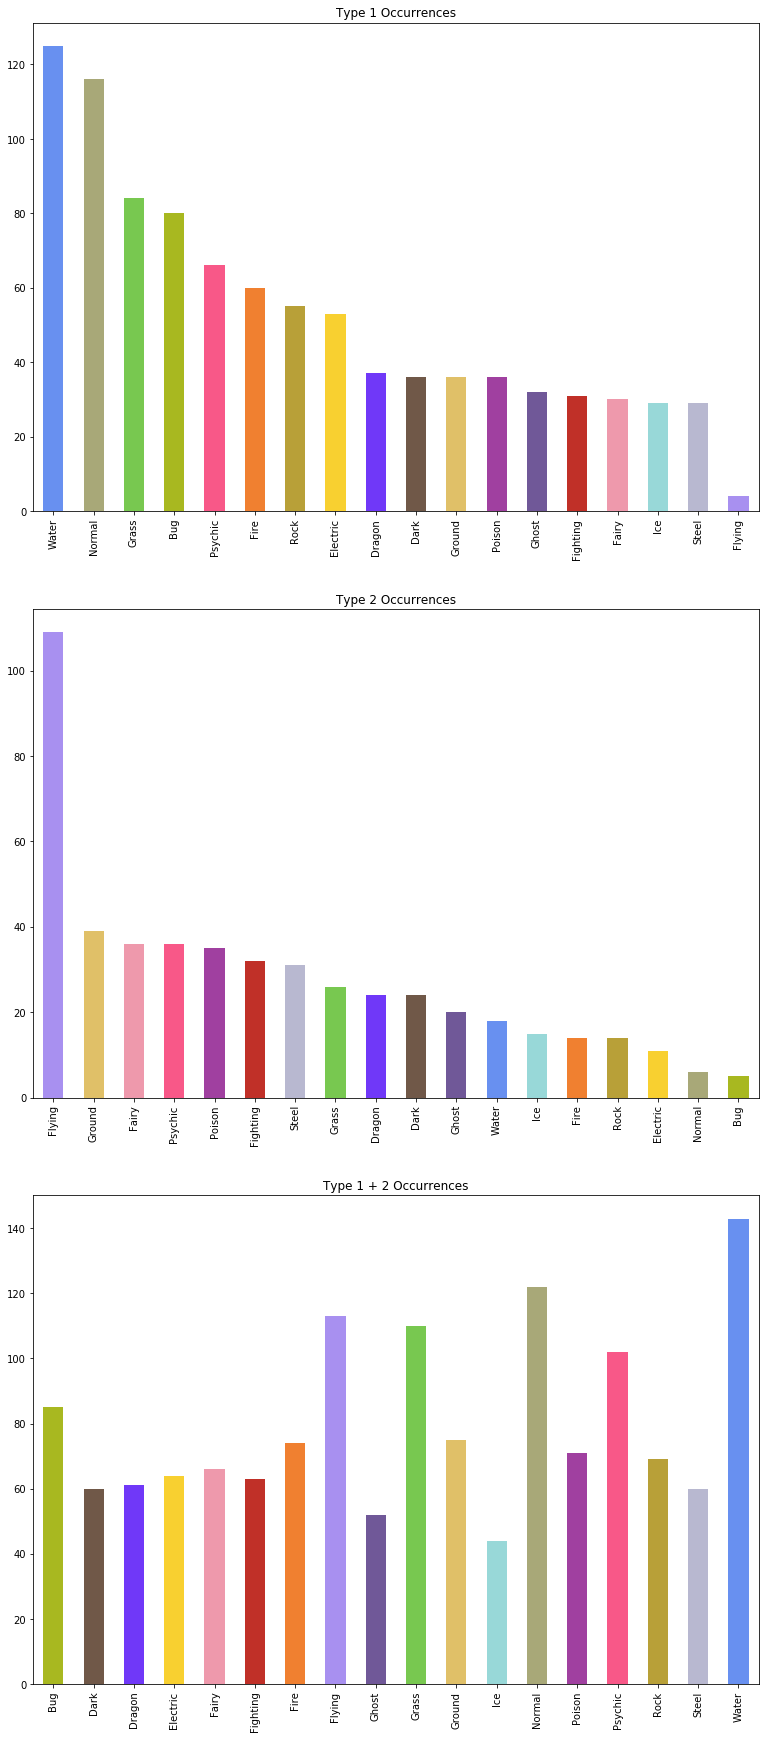

In [13]:
# Plot Type 1 and Type 2 occurences to see the distributions
typeFig, typeAxes = plt.subplots(nrows=3, ncols=1)
typeFig.subplots_adjust(top=1.9)

type1Counts = data["Type 1"].value_counts()
type2Counts = data["Type 2"].value_counts().drop("None")
typesCounts = type1Counts.add(type2Counts, fill_value=0)

type1Counts.plot(title="Type 1 Occurrences", kind="bar", ax=typeAxes[0], color=getColorList(type1Counts))
type2Counts.plot(title="Type 2 Occurrences", kind="bar", ax=typeAxes[1], color=getColorList(type2Counts))
typesCounts.plot(title="Type 1 + 2 Occurrences", kind="bar", ax=typeAxes[2], color=getColorList(typesCounts))

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Group Types')]

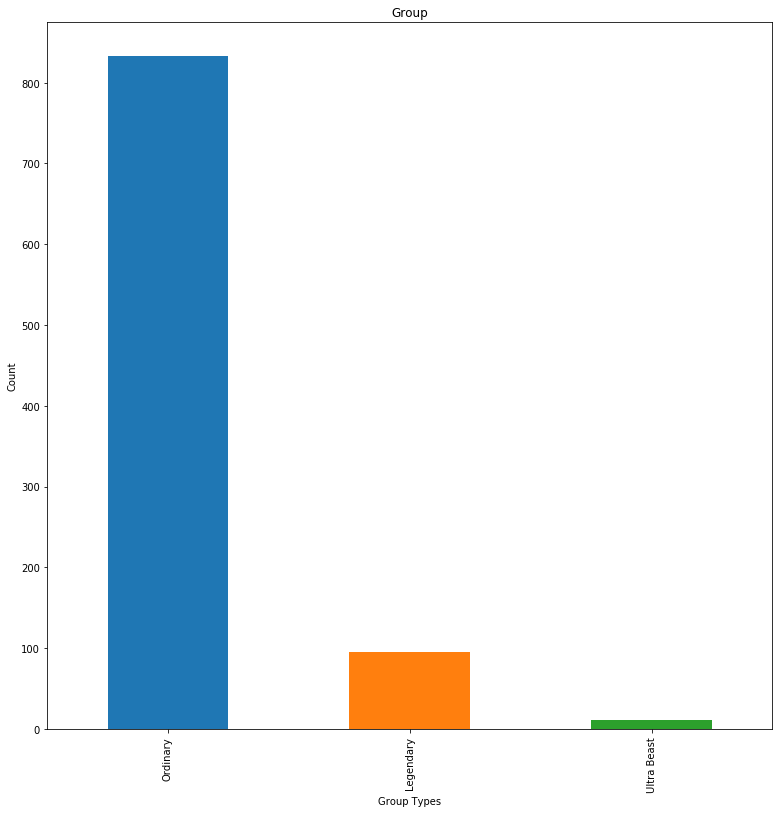

In [14]:
# Plot Group occurences to see the distributions
groupFig, groupAxes = plt.subplots(nrows=1, ncols=1)
groupCounts = data["Group"].value_counts()
groupAxe = groupCounts.plot(title="Group", kind="bar")
groupAxe.set(xlabel="Group Types", ylabel="Count")

In [18]:
profile = pdp.ProfileReport(data)
profile.to_file("Profile.html")
profile = None
gc.collect()

28

In [ ]:
# Get all distinct egg groups
eggGroups = []
for i in data["EggGroups"].value_counts().index:
    eg = i[1:-1].split(", ")
    eggGroups += eg
    
eggGroups = set(eggGroups)

In [ ]:
# Get all distinct abilities
abilities = []
for i in data["Abilities"].value_counts().index:
    ability = i[1:-1].split(", ")
    abilities += ability
    
abilities = set(abilities)

In [ ]:
def getEncodingBits(collection):
    encodingBitCount = math.ceil(math.log(len(collection), 2))
    for i, item in enumerate(collection):
        binary = bin(i)
        print(str(binary), item)

In [17]:
gc.collect()

0